In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
%config InlineBackend.figure_format = 'retina'

In [194]:
#!conda install -y -c conda-forge pandas-profiling 

In [206]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

df = pd.read_excel("data/2019_Accidentalidad.xlsx", parse_dates={'datetime': ['FECHA', 'HORA']}, date_parser=dateparse)
df.shape

(33175, 13)

Muy bien, parece que tenemos 33175 accidentes

In [207]:
#df.profile_report()
df

,datetime,Nº EXPEDIENTE,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*,* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.
0,2019-01-01 23:30:00,2019S000020,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,NaN
1,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,NaN
2,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0,NaN
3,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0,NaN
4,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33170,2019-08-31 02:00:00,2019S029472,ANTONIO LOPEZ,-,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 45 A 49 AÑOS,Mujer,14.0,NaN
33171,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 18 A 20 AÑOS,Mujer,14.0,NaN
33172,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 50 A 54 AÑOS,Hombre,14.0,NaN
33173,2019-08-31 00:05:00,2019S029152,GLORIETA DEL POZO,-,PUENTE DE VALLECAS,Colisión lateral,Despejado,Turismo,Conductor,DE 55 A 59 AÑOS,Hombre,NaN,NaN


In [208]:
df.drop(df.columns[-1], axis=1, inplace=True)
df["NÚMERO"] = df["NÚMERO"].replace('-', np.nan)
df

,datetime,Nº EXPEDIENTE,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*
0,2019-01-01 23:30:00,2019S000020,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0
1,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0
2,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0
3,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0
4,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33170,2019-08-31 02:00:00,2019S029472,ANTONIO LOPEZ,NaN,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 45 A 49 AÑOS,Mujer,14.0
33171,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 18 A 20 AÑOS,Mujer,14.0
33172,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 50 A 54 AÑOS,Hombre,14.0
33173,2019-08-31 00:05:00,2019S029152,GLORIETA DEL POZO,NaN,PUENTE DE VALLECAS,Colisión lateral,Despejado,Turismo,Conductor,DE 55 A 59 AÑOS,Hombre,NaN


In [212]:
print(df.dtypes)
print(df.shape)
df_reduced = df.groupby(["Nº  EXPEDIENTE"]).first().reset_index()
print(df_reduced.shape)
df_reduced

datetime                datetime64[ns]
Nº  EXPEDIENTE                  object
CALLE                           object
NÚMERO                          object
DISTRITO                        object
TIPO ACCIDENTE                  object
ESTADO METEREOLÓGICO            object
TIPO VEHÍCULO                   object
TIPO PERSONA                    object
RANGO DE EDAD                   object
SEXO                            object
LESIVIDAD*                     float64
dtype: object
(33175, 12)
(14007, 12)


,Nº EXPEDIENTE,datetime,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*
0,2018S017842,2019-02-04 09:10:00,CALL. ALBERTO AGUILERA,1,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,DE 45 A 49 AÑOS,Hombre,7.0
1,2019S000001,2019-01-01 03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,NaN,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,DE 40 A 44 AÑOS,Hombre,NaN
2,2019S000002,2019-01-01 03:50:00,CALL. CUART DE POBLET,65,LATINA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DE 21 A 24 AÑOS,Hombre,2.0
3,2019S000003,2019-01-01 04:00:00,CALL. MARCELO USERA,30,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Hombre,NaN
4,2019S000004,2019-01-01 04:00:00,CALL. ISLA DE OZA,15,MONCLOA-ARAVACA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DE 60 A 64 AÑOS,Hombre,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14002,2019S029929,2019-08-30 08:50:00,AVDA. PUERTA DE HIERRO,2,MONCLOA-ARAVACA,Caída,Despejado,Motocicleta hasta 125cc,Conductor,DE 40 A 44 AÑOS,Hombre,2.0
14003,2019S029932,2019-08-31 12:37:00,PASEO. MORET,1,MONCLOA-ARAVACA,Colisión lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Hombre,NaN
14004,2019S029957,2019-08-29 23:25:00,VALDETORRES DE JARAMA,1,HORTALEZA,Caída,Despejado,Motocicleta hasta 125cc,Conductor,DE 25 A 29 AÑOS,Mujer,2.0
14005,2019S030029,2019-08-13 12:15:00,"AUTOV. M-30, CALZADA EXTERIOR P.K. 9,100",NaN,MORATALAZ,Otro,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,NaN


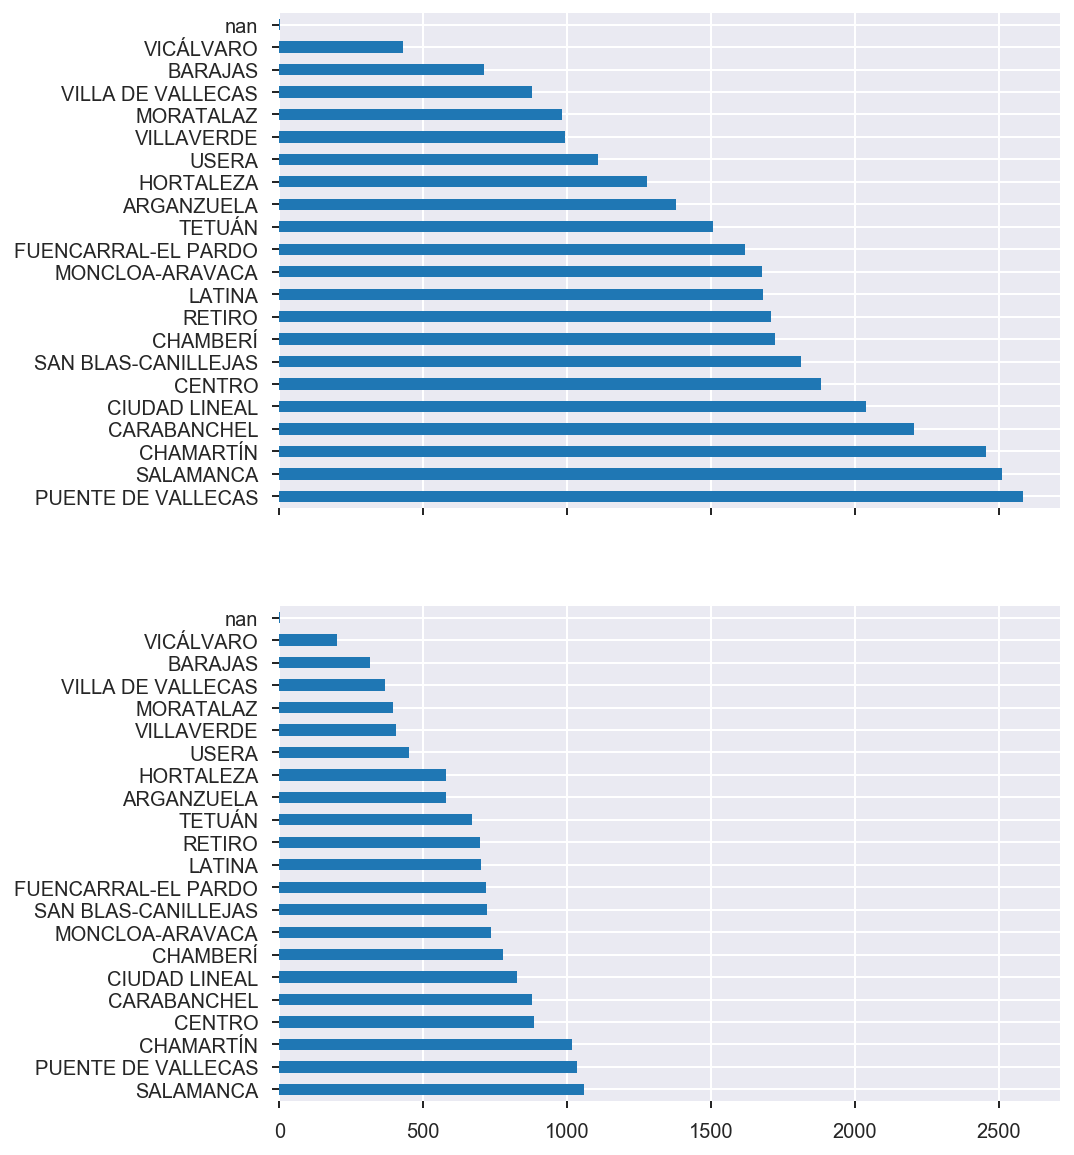

In [210]:
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row', figsize=(7,10))

df['DISTRITO'].value_counts(dropna=False).plot.barh(ax=ax[0])
df_reduced['DISTRITO'].value_counts(dropna=False).plot.barh(ax=ax[1])

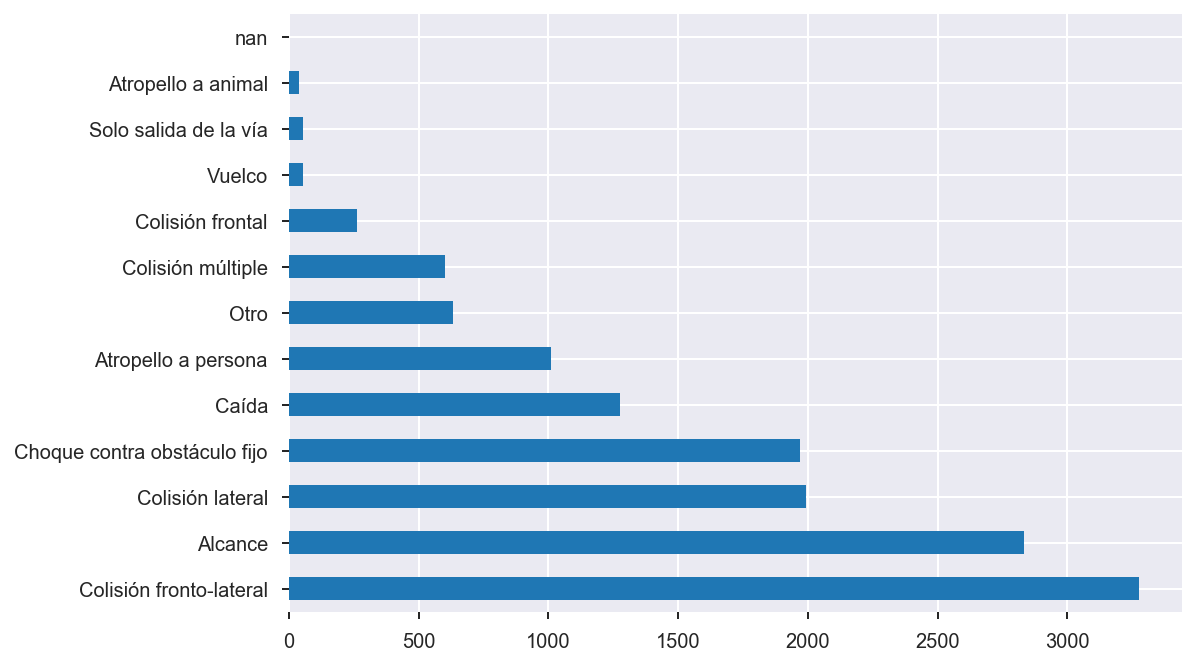

In [189]:
df_reduced['TIPO ACCIDENTE'].value_counts(dropna=False).plot.barh()

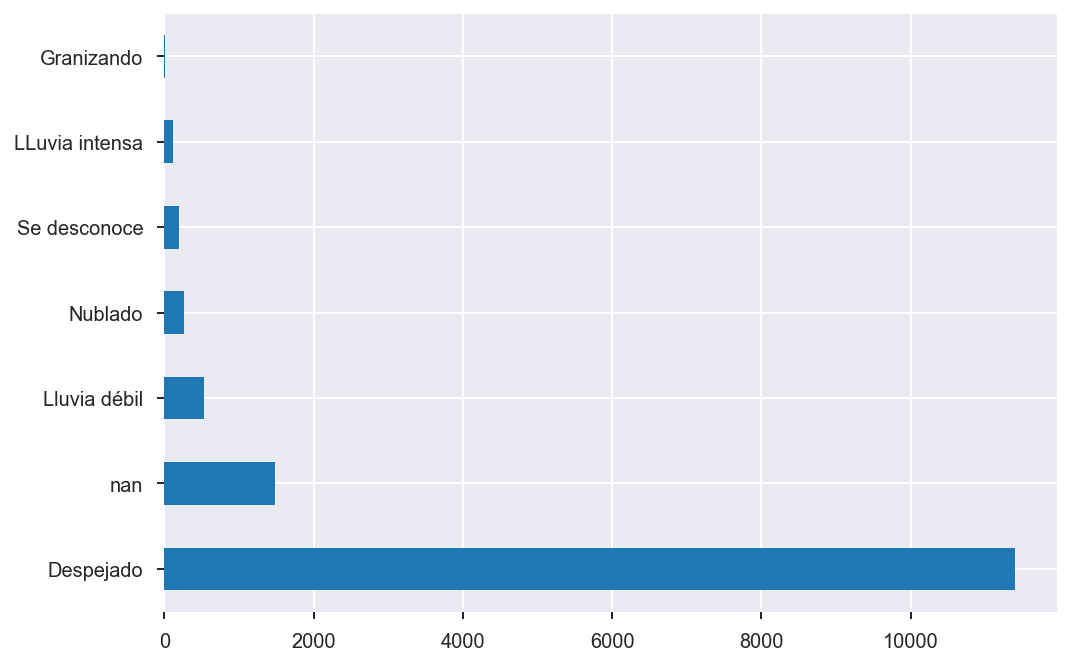

In [190]:
df_reduced['ESTADO METEREOLÓGICO'].value_counts(dropna=False).plot.barh()

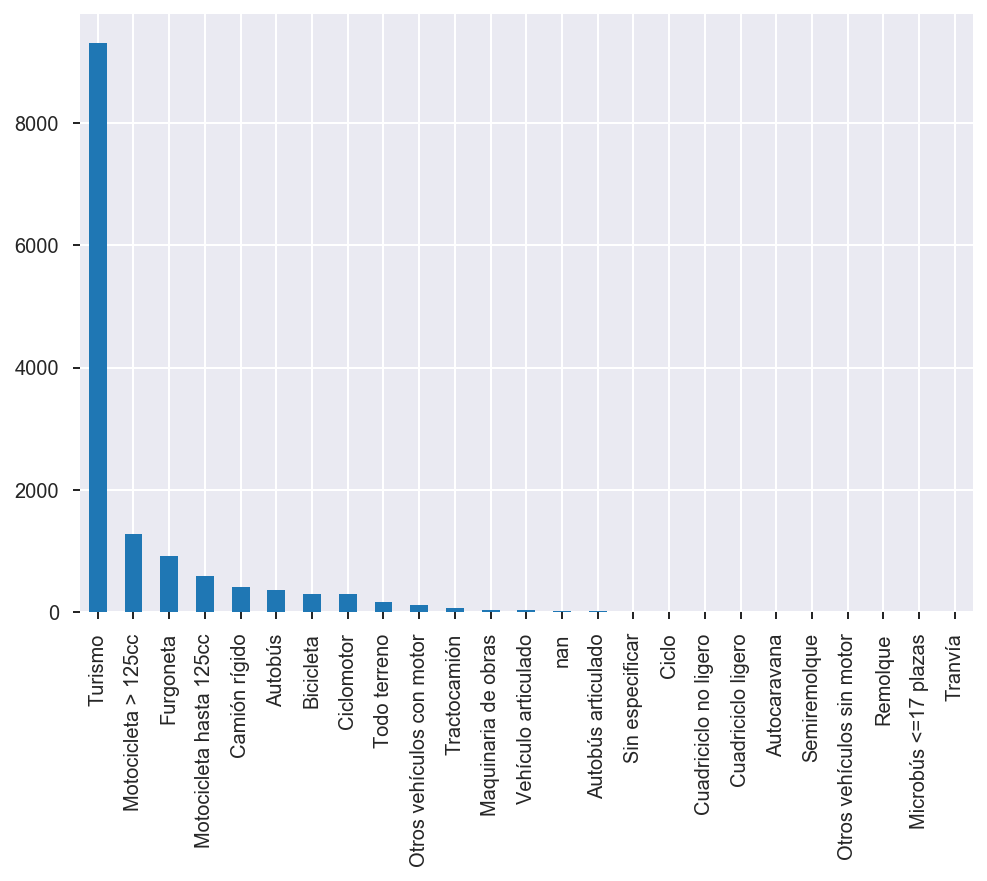

In [191]:
df_reduced['TIPO VEHÍCULO'].value_counts(dropna=False).plot(kind='bar')

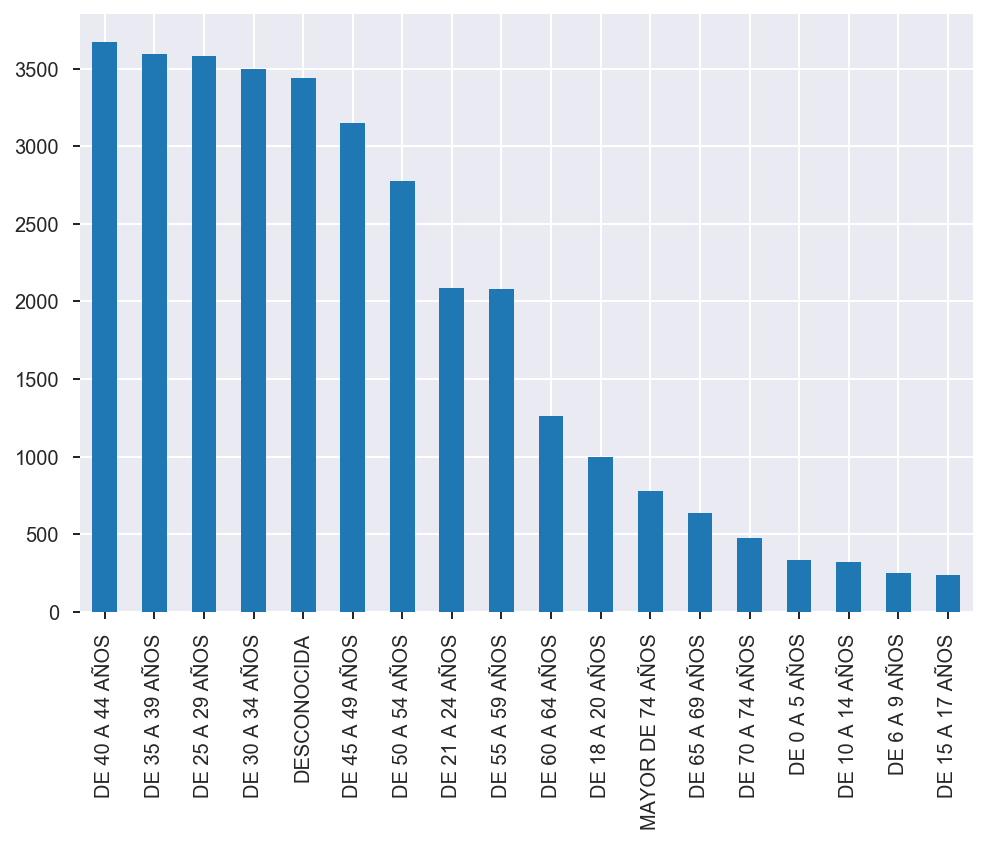

In [193]:
df['RANGO DE EDAD'].value_counts(dropna=False).plot(kind='bar')

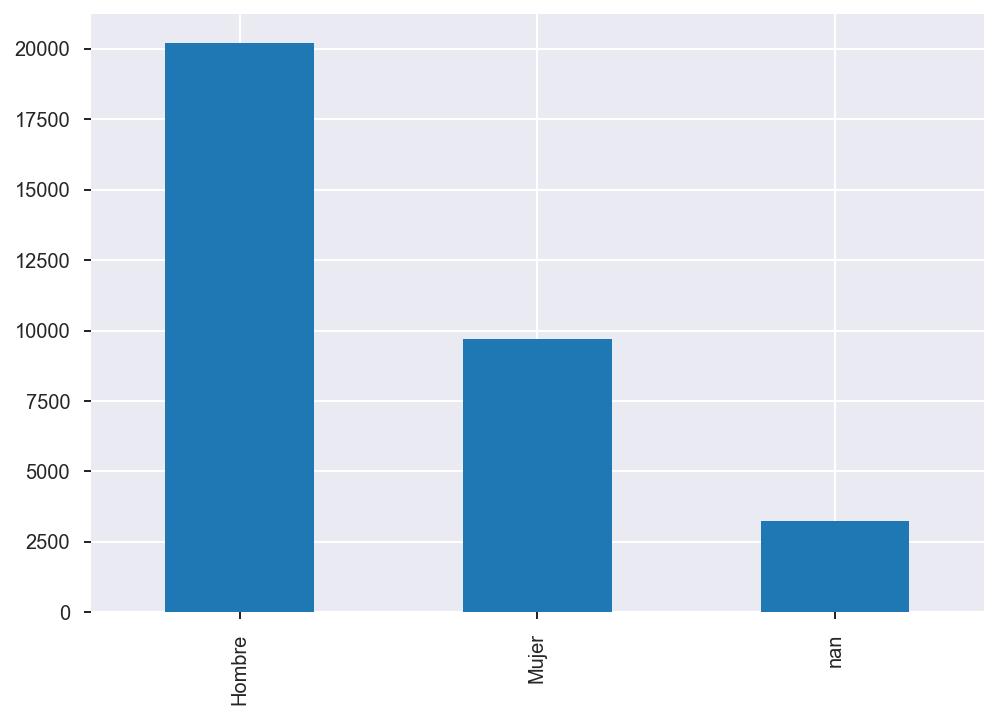

In [185]:
df['SEXO'].value_counts(dropna=False).plot(kind='bar')

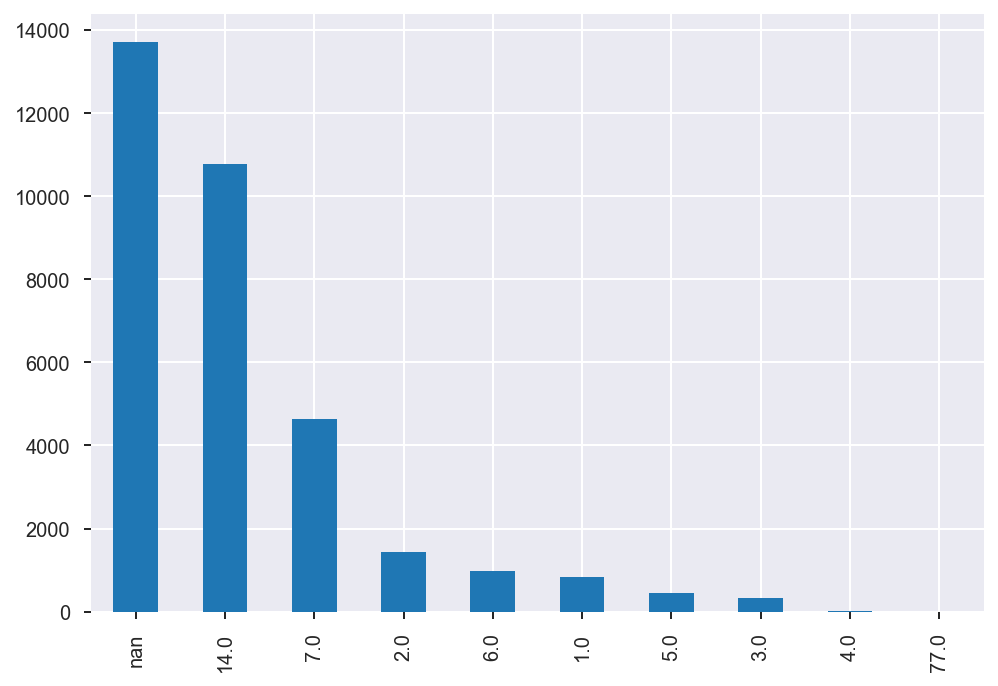

In [186]:
df['LESIVIDAD*'].value_counts(dropna=False).plot(kind='bar')

01 Atención en urgencias sin posterior ingreso. - LEVE 

02 Ingreso inferior o igual a 24 horas - LEVE

03 Ingreso superior a 24 horas. - GRAVE

04 Fallecido 24 horas - FALLECIDO

05 Asistencia sanitaria ambulatoria con posterioridad - LEVE

06 Asistencia sanitaria inmediata en centro de salud o mutua - LEVE

07 Asistencia sanitaria sólo en el lugar del accidente - LEVE

14 Sin asistencia sanitaria

77 Se desconoce

nan Sin asistencia sanitaria
